In [1]:
## Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import OneHotEncoder 
from category_encoders import BinaryEncoder
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [2]:
train = pd.read_excel(r'E:\Data science 2022-Epsilon\Training\2nd Project\Data_Train.xlsx',sheet_name='Sheet1')

In [3]:
train.head().T

,0,1,2,3,4
Airline,IndiGo,Air India,Jet Airways,IndiGo,IndiGo
Date_of_Journey,24/03/2019,1/05/2019,9/06/2019,12/05/2019,01/03/2019
Source,Banglore,Kolkata,Delhi,Kolkata,Banglore
Destination,New Delhi,Banglore,Cochin,Banglore,New Delhi
Route,BLR → DEL,CCU → IXR → BBI → BLR,DEL → LKO → BOM → COK,CCU → NAG → BLR,BLR → NAG → DEL
Dep_Time,22:20,05:50,09:25,18:05,16:50
Arrival_Time,01:10 22 Mar,13:15,04:25 10 Jun,23:30,21:35
Duration,2h 50m,7h 25m,19h,5h 25m,4h 45m
Total_Stops,non-stop,2 stops,2 stops,1 stop,1 stop
Additional_Info,No info,No info,No info,No info,No info


In [4]:
train.shape


(10683, 11)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
## check duplicated  
len(train[ train.duplicated() ])

220

In [7]:
## drop duplicated in data
train.drop_duplicates(inplace =True)

## univariate analysis


In [8]:

train['Airline'].value_counts()

Jet Airways                          3700
IndiGo                               2043
Air India                            1695
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

<AxesSubplot:xlabel='Airline', ylabel='count'>

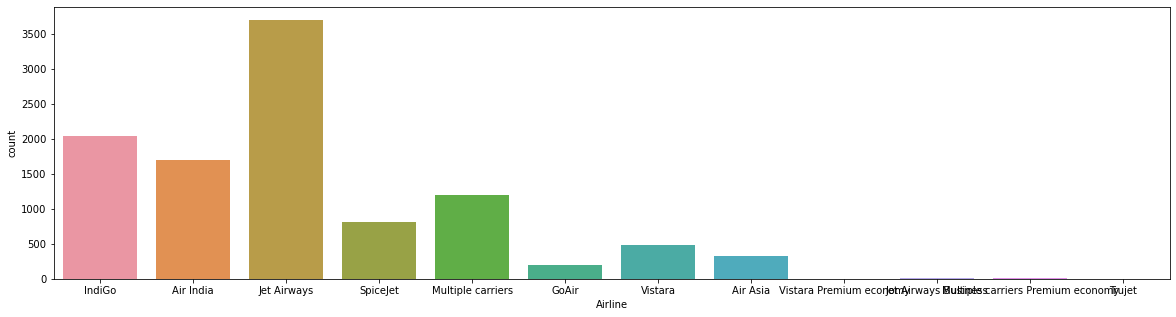

In [9]:
fig= plt.figure(figsize=(20,5))
sns.countplot(data=train,x='Airline')


-  The Jet Airways Airline have the largest number of flights than IndiGo and Air India.

In [10]:
train['Date_of_Journey'].unique()

array(['24/03/2019', '1/05/2019', '9/06/2019', '12/05/2019', '01/03/2019',
       '24/06/2019', '12/03/2019', '27/05/2019', '1/06/2019',
       '18/04/2019', '9/05/2019', '24/04/2019', '3/03/2019', '15/04/2019',
       '12/06/2019', '6/03/2019', '21/03/2019', '3/04/2019', '6/05/2019',
       '15/05/2019', '18/06/2019', '15/06/2019', '6/04/2019',
       '18/05/2019', '27/06/2019', '21/05/2019', '06/03/2019',
       '3/06/2019', '15/03/2019', '3/05/2019', '9/03/2019', '6/06/2019',
       '24/05/2019', '09/03/2019', '1/04/2019', '21/04/2019',
       '21/06/2019', '27/03/2019', '18/03/2019', '12/04/2019',
       '9/04/2019', '1/03/2019', '03/03/2019', '27/04/2019'], dtype=object)

In [11]:
train['Date_of_Journey']=pd.to_datetime(train['Date_of_Journey'], format='%d/%m/%Y')

In [12]:
train['Month_of_Journey']=train['Date_of_Journey'].dt.month_name()

In [13]:
train['Month_of_Journey'].value_counts()

May      3396
June     3311
March    2678
April    1078
Name: Month_of_Journey, dtype: int64

<AxesSubplot:xlabel='Month_of_Journey', ylabel='count'>

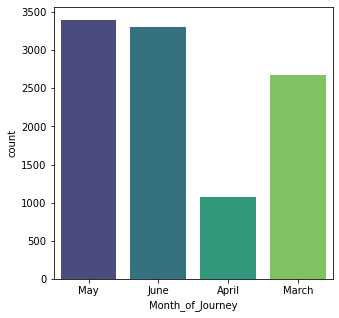

In [14]:
fig= plt.figure(figsize=(5,5))
sns.countplot(x='Month_of_Journey', data=train, palette='viridis',order =['May','June','April','March'])

-  Most of Journery are  in month May and June.

In [15]:
train['Day_of_Journey']=train['Date_of_Journey'].dt.day_name()

<AxesSubplot:xlabel='Day_of_Journey', ylabel='count'>

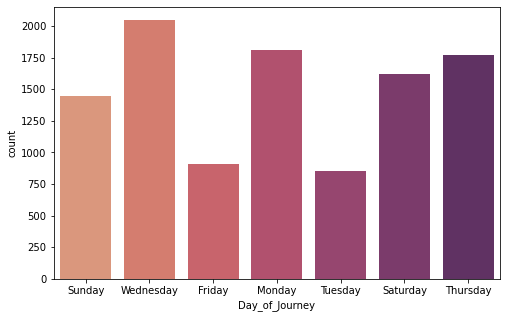

In [16]:
fig= plt.figure(figsize=(8,5))
sns.countplot(x='Day_of_Journey', data=train, palette='flare')

-  Most of Journery are in wednesday and thursday.

In [17]:
train['Source'].value_counts()

Delhi       4346
Kolkata     2860
Banglore    2179
Mumbai       697
Chennai      381
Name: Source, dtype: int64

<AxesSubplot:xlabel='Source', ylabel='count'>

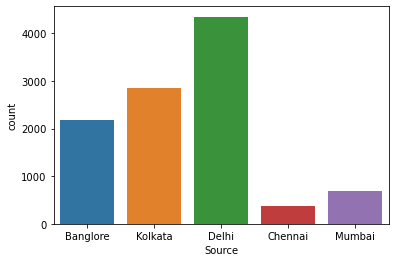

In [18]:
sns.countplot(data=train,x='Source')


- Delhi largest Source of Journey.

In [19]:
train['Destination'].value_counts()

Cochin       4346
Banglore     2860
Delhi        1265
New Delhi     914
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

<AxesSubplot:xlabel='Destination', ylabel='count'>

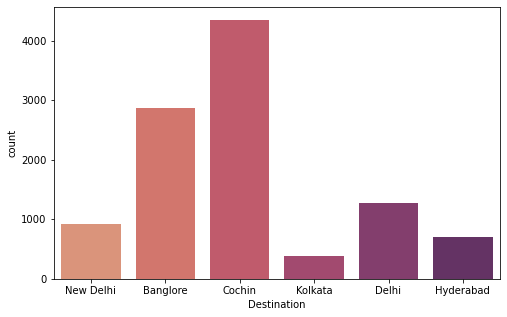

In [20]:
fig= plt.figure(figsize=(8,5))
sns.countplot(x='Destination', data=train, palette='flare')

In [21]:
train['Route'].value_counts()

DEL → BOM → COK          2376
BLR → DEL                1536
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → IXZ → MAA → BLR       1
CCU → IXA → BLR             1
BOM → GOI → HYD             1
CCU → RPR → HYD → BLR       1
CCU → VTZ → BLR             1
Name: Route, Length: 128, dtype: int64

In [22]:
train['Dep_Time'].value_counts()

18:55    233
17:00    227
07:05    202
07:10    201
10:00    196
        ... 
04:15      1
12:45      1
16:25      1
21:35      1
21:40      1
Name: Dep_Time, Length: 222, dtype: int64

In [23]:
train['Dep_Time']=train['Dep_Time'].str[:2]

In [24]:
train['Dep_Time'].unique()

array(['22', '05', '09', '18', '16', '08', '11', '20', '21', '17', '14',
       '04', '07', '10', '15', '06', '19', '23', '13', '02', '12', '00',
       '01', '03'], dtype=object)

In [25]:
train['Arrival_Time'].value_counts()

19:00           412
21:00           360
19:15           333
16:10           154
12:35           122
               ... 
23:35 22 May      1
18:00 25 May      1
00:05 22 Apr      1
00:50 22 Apr      1
00:25 10 Jun      1
Name: Arrival_Time, Length: 1343, dtype: int64

In [26]:
train['Arrival_Time']=train['Arrival_Time'].str[:2]

In [27]:
train['Arrival_Time'].unique()

array(['01', '13', '04', '23', '21', '11', '10', '05', '19', '22', '09',
       '12', '06', '08', '03', '20', '16', '18', '15', '14', '00', '02',
       '07', '17'], dtype=object)

In [28]:
train['Dep_Time'] = train['Dep_Time'].astype(str).astype(int)
train['Arrival_Time'] = train['Arrival_Time'].astype(str).astype(int)

In [29]:
train.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Month_of_Journey', 'Day_of_Journey'],
      dtype='object')

In [30]:
train['Duration'].value_counts()

2h 50m     544
1h 30m     386
2h 45m     335
2h 55m     332
2h 35m     329
          ... 
42h 45m      1
37h 10m      1
31h 30m      1
30h 15m      1
29h 40m      1
Name: Duration, Length: 368, dtype: int64

In [31]:
train['Duration_hour']=train['Duration'].str.split('h').str[0]

In [32]:
train['Duration_hour'].unique()

array(['2', '7', '19', '5', '4', '15', '21', '25', '13', '12', '26', '22',
       '23', '20', '10', '6', '11', '8', '16', '3', '27', '1', '14', '9',
       '18', '17', '24', '30', '28', '29', '37', '34', '38', '35', '36',
       '47', '33', '32', '31', '42', '39', '5m', '41', '40'], dtype=object)

In [33]:
train_5m=train[train['Duration_hour']=='5m'].index
train_5m

Int64Index([6474], dtype='int64')

In [34]:
train.drop(train_5m,inplace=True)

In [35]:
train['Duration_hour']=train['Duration_hour'].astype(int)

In [36]:
train['Duration_min']=train['Duration'].str.split('h').str[1].replace(['m'],'')

In [37]:
train['Duration_min'].unique()

array([' 50m', ' 25m', '', ' 45m', ' 30m', ' 5m', ' 15m', ' 35m', ' 10m',
       ' 20m', ' 55m', ' 40m'], dtype=object)

In [38]:
train['Duration_min']=train['Duration_min'].str[:-1]
train['Duration_min'].unique()

array([' 50', ' 25', '', ' 45', ' 30', ' 5', ' 15', ' 35', ' 10', ' 20',
       ' 55', ' 40'], dtype=object)

In [39]:
train['Duration_min'].replace('',np.nan,inplace=True)

In [40]:
train['Duration_min'].fillna(0,inplace=True)


In [41]:
train['Duration_min']=train['Duration_min'].astype(int)

In [42]:
def convert_to_minutes(h):
    if h>12:
        return (h-12)*60
    else:
        return h*60
    
train['Duration_hour']=train['Duration_hour'].apply(convert_to_minutes)
train['Duration_min']=train['Duration_hour']+train['Duration_min']


In [43]:
train.drop(columns=['Duration_hour','Duration'],inplace=True)


In [44]:
train.head(5).T

,0,1,2,3,4
Airline,IndiGo,Air India,Jet Airways,IndiGo,IndiGo
Date_of_Journey,2019-03-24 00:00:00,2019-05-01 00:00:00,2019-06-09 00:00:00,2019-05-12 00:00:00,2019-03-01 00:00:00
Source,Banglore,Kolkata,Delhi,Kolkata,Banglore
Destination,New Delhi,Banglore,Cochin,Banglore,New Delhi
Route,BLR → DEL,CCU → IXR → BBI → BLR,DEL → LKO → BOM → COK,CCU → NAG → BLR,BLR → NAG → DEL
Dep_Time,22,5,9,18,16
Arrival_Time,1,13,4,23,21
Total_Stops,non-stop,2 stops,2 stops,1 stop,1 stop
Additional_Info,No info,No info,No info,No info,No info
Price,3897,7662,13882,6218,13302


In [45]:
train['Total_Stops'].value_counts(normalize=True)*100


1 stop      53.771150
non-stop    33.218622
2 stops     12.589619
3 stops      0.411051
4 stops      0.009559
Name: Total_Stops, dtype: float64

<AxesSubplot:ylabel='Total_Stops'>

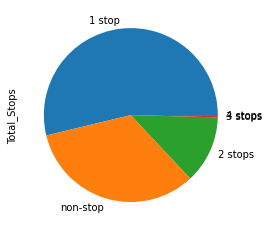

In [46]:
train['Total_Stops'].value_counts(normalize=True).plot.pie()

- Most journeys take one stop during the journey.

In [47]:
train['Total_Stops'].replace('non-stop', 0, inplace=True)
train['Total_Stops'].replace('1 stop', 1, inplace=True)
train['Total_Stops'].replace('2 stops', 2, inplace=True)
train['Total_Stops'].replace('3 stops', 3, inplace=True)
train['Total_Stops'].replace('4 stops', 4, inplace=True)

In [48]:
train['Total_Stops'].unique()

array([ 0.,  2.,  1.,  3., nan,  4.])

In [49]:
train['Additional_Info'].value_counts()

No info                         8182
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
Red-eye flight                     1
1 Short layover                    1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [50]:
train['Additional_Info'] = train['Additional_Info'].str.replace('No info', 'No Info')

In [51]:
train['Additional_Info']= train['Additional_Info'].str.replace('2 Long layover' ,'1 Long layover' )

In [52]:
train['Additional_Info']= train['Additional_Info'].str.replace('No check-in baggage included','In-flight meal not included')

In [53]:
train['Additional_Info'].value_counts()

No Info                        8185
In-flight meal not included    2244
1 Long layover                   20
Change airports                   7
Business class                    4
Red-eye flight                    1
1 Short layover                   1
Name: Additional_Info, dtype: int64

In [54]:
train['Price'].value_counts()

10262    258
10844    212
7229     161
4804     160
4823     131
        ... 
6878       1
6633       1
19172      1
4839       1
4098       1
Name: Price, Length: 1870, dtype: int64

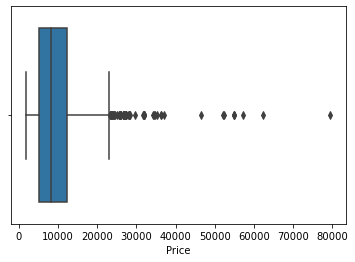

In [55]:
sns.boxplot(x= 'Price', data=train);

In [56]:
train.describe()

,Dep_Time,Arrival_Time,Total_Stops,Price,Duration_min
count,10462.000000,10462.000000,10461.000000,10462.000000,10462.000000
mean,12.477825,13.387020,0.802218,9025.849073,395.307781
std,5.727225,6.855633,0.660537,4624.162125,276.348543
min,0.000000,0.000000,0.000000,1759.000000,60.000000
25%,8.000000,8.000000,0.000000,5224.000000,165.000000
50%,11.000000,14.000000,1.000000,8266.000000,320.000000
75%,18.000000,19.000000,1.000000,12337.500000,600.000000
max,23.000000,23.000000,4.000000,79512.000000,2140.000000


In [57]:
train.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Total_Stops', 'Additional_Info', 'Price',
       'Month_of_Journey', 'Day_of_Journey', 'Duration_min'],
      dtype='object')

In [58]:
## remove unnecessary columns:
train.drop(['Date_of_Journey','Route'],axis=1,inplace=True)

In [59]:
train.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Price,Month_of_Journey,Day_of_Journey,Duration_min
0,IndiGo,Banglore,New Delhi,22,1,0.0,No Info,3897,March,Sunday,170
1,Air India,Kolkata,Banglore,5,13,2.0,No Info,7662,May,Wednesday,445
2,Jet Airways,Delhi,Cochin,9,4,2.0,No Info,13882,June,Sunday,420
3,IndiGo,Kolkata,Banglore,18,23,1.0,No Info,6218,May,Sunday,325
4,IndiGo,Banglore,New Delhi,16,21,1.0,No Info,13302,March,Friday,285


## Bivariate analysis

In [60]:
NUM_col=train.select_dtypes(include=np.number).columns
NUM_col

Index(['Dep_Time', 'Arrival_Time', 'Total_Stops', 'Price', 'Duration_min'], dtype='object')

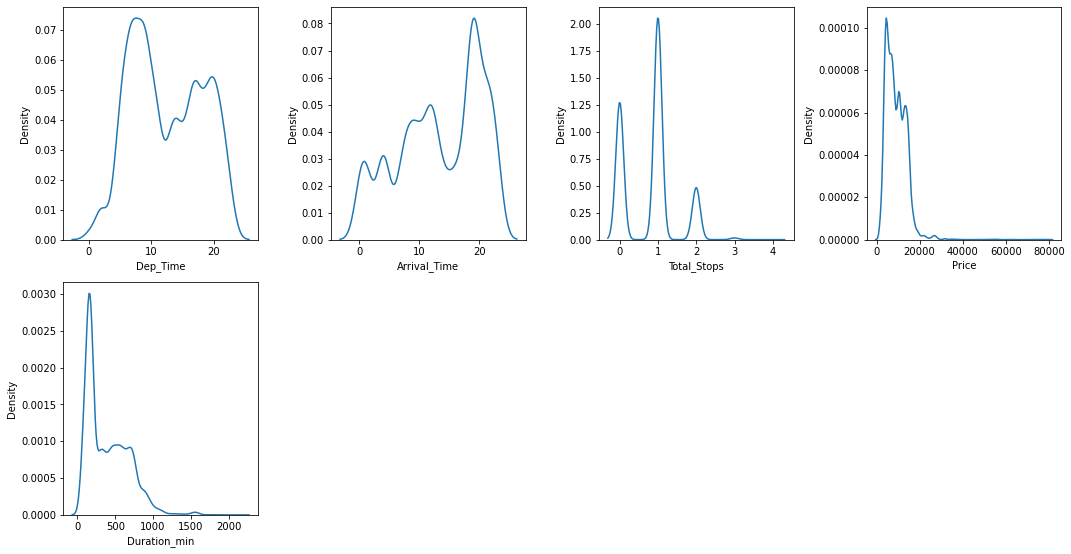

In [61]:
fig = plt.figure(figsize= (15,15))
for i, col in enumerate(NUM_col):
    
    ax=fig.add_subplot(4,4,i+1)
    
    sns.kdeplot(x=train[col], ax=ax)
    
fig.tight_layout()  
plt.show()

- Dep_Time and Arrival_Time represent normal distribution but price and Duration_min  didn't represent normal distribution.

In [62]:
train['Price'].sort_values(ascending=True)

10513     1759
4839      1759
4274      1759
4066      1759
1513      1840
         ...  
1478     54826
5439     54826
10364    57209
5372     62427
2924     79512
Name: Price, Length: 10462, dtype: int64

In [63]:
train.corr()['Price']

Dep_Time        0.005070
Arrival_Time    0.030982
Total_Stops     0.601889
Price           1.000000
Duration_min    0.457852
Name: Price, dtype: float64

<AxesSubplot:xlabel='Dep_Time', ylabel='Price'>

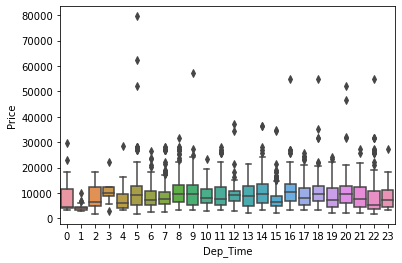

In [64]:
sns.boxplot(x= 'Dep_Time',y='Price',data=train)

<AxesSubplot:xlabel='Additional_Info', ylabel='Price'>

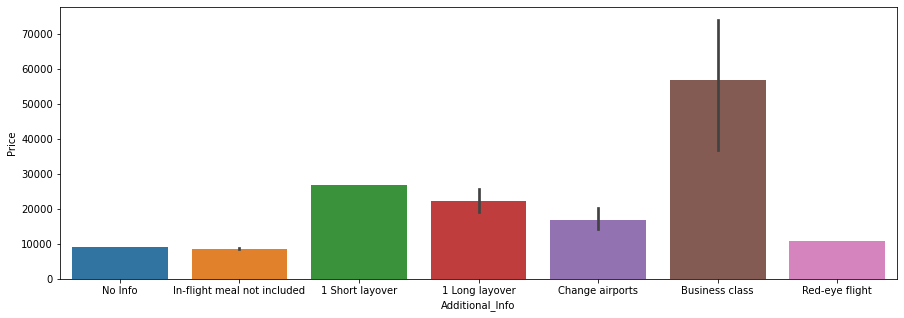

In [65]:
fig = plt.figure(figsize= (15,5))
sns.barplot(x='Additional_Info',y='Price',data=train)

<AxesSubplot:xlabel='Arrival_Time', ylabel='Price'>

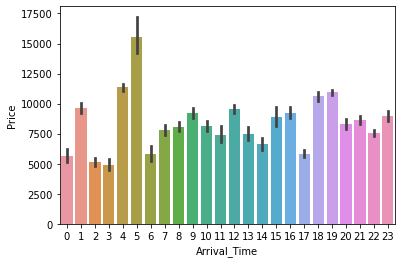

In [66]:
sns.barplot(x='Arrival_Time',y='Price',data=train)

- Arrival time between 4-5 hors have highst price.

In [67]:
Cat_col=train.select_dtypes(include='object').columns
Cat_col

Index(['Airline', 'Source', 'Destination', 'Additional_Info',
       'Month_of_Journey', 'Day_of_Journey'],
      dtype='object')

In [68]:
Airline_top10=train.groupby('Airline')['Price'].sum()[0:10]
Airline_top10=Airline_top10.to_frame()
Airline_top10=Airline_top10.sort_values('Price',ascending=False)
Airline_top10

,Price
Airline,
Jet Airways,42916378
Air India,16179047
Multiple carriers,13039603
IndiGo,11580684
SpiceJet,3533711
Air Asia,1783293
GoAir,1137045
Jet Airways Business,350152
Multiple carriers Premium economy,148445


<AxesSubplot:xlabel='Price', ylabel='Airline'>

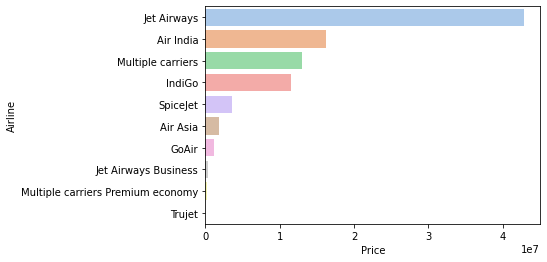

In [69]:
sns.barplot(y=Airline_top10.index[0:15],x=Airline_top10['Price'][0:10],palette='pastel',orient='h')

- JetAirways showing highest price.

<AxesSubplot:xlabel='Source', ylabel='Price'>

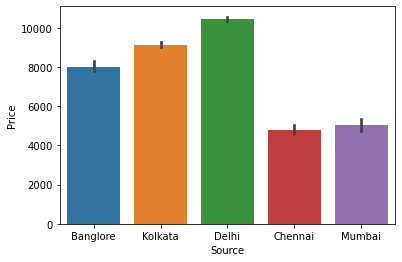

In [70]:
sns.barplot(x='Source',y='Price',data=train)

- Delhi source showing highest price more than 10000  then KolKata more that 8000 nd less than 10000.

<AxesSubplot:xlabel='Destination', ylabel='Price'>

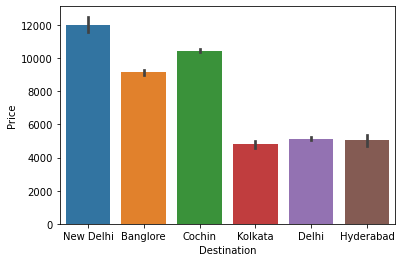

In [71]:
sns.barplot(data=train,x='Destination',y='Price')

- New Delhi showing highest price of destination with 12000 then Cochin more that 10000 and less than 12000.

<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

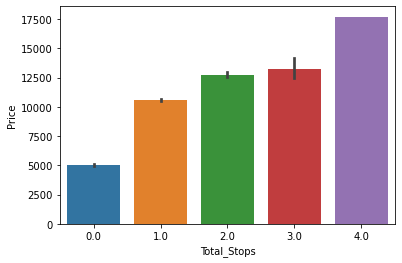

In [72]:
sns.barplot(data=train,x='Total_Stops',y='Price')

- When Journey stop for 4 times will get high price .

<AxesSubplot:xlabel='Month_of_Journey', ylabel='Price'>

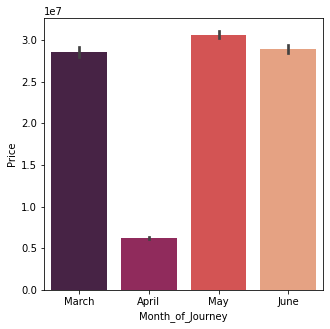

In [73]:
fig = plt.figure(figsize= (5,5))
sns.barplot(x='Month_of_Journey', y='Price', estimator=np.sum, data=train, palette='rocket',order =['March','April','May','June'])


- May showing highest price.

<AxesSubplot:xlabel='Day_of_Journey', ylabel='Price'>

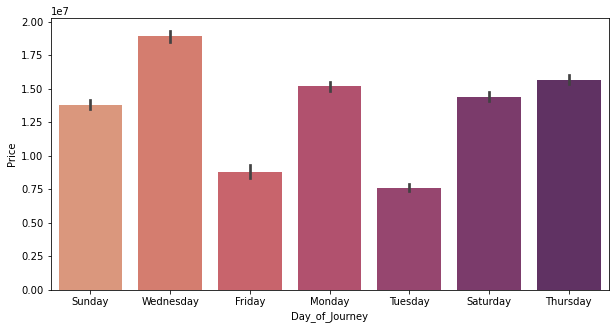

In [74]:
fig = plt.figure(figsize= (10,5))
sns.barplot(x='Day_of_Journey', y='Price', estimator=np.sum, data=train, palette='flare')

- Wednesday showing highest price.

In [75]:
train.duplicated().sum()

800

In [76]:
train.drop_duplicates(inplace = True)

## Missing values

In [77]:
train.isnull().mean() *100

Airline             0.00000
Source              0.00000
Destination         0.00000
Dep_Time            0.00000
Arrival_Time        0.00000
Total_Stops         0.01035
Additional_Info     0.00000
Price               0.00000
Month_of_Journey    0.00000
Day_of_Journey      0.00000
Duration_min        0.00000
dtype: float64

In [78]:
train.dropna(inplace = True)

In [79]:
train.isnull().mean()

Airline             0.0
Source              0.0
Destination         0.0
Dep_Time            0.0
Arrival_Time        0.0
Total_Stops         0.0
Additional_Info     0.0
Price               0.0
Month_of_Journey    0.0
Day_of_Journey      0.0
Duration_min        0.0
dtype: float64

In [80]:
train.reset_index(drop = True , inplace = True)

In [81]:
col=train.columns  
col

Index(['Airline', 'Source', 'Destination', 'Dep_Time', 'Arrival_Time',
       'Total_Stops', 'Additional_Info', 'Price', 'Month_of_Journey',
       'Day_of_Journey', 'Duration_min'],
      dtype='object')

In [82]:
Cat_col

Index(['Airline', 'Source', 'Destination', 'Additional_Info',
       'Month_of_Journey', 'Day_of_Journey'],
      dtype='object')

In [83]:
## feature engineer for Airline. 
train['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [84]:
train['Airline'] = train['Airline'].str.replace('Jet Airways Business', 'Jet Airways').replace('Vistara Premium economy','Vistara').replace('Multiple carriers Premium economy','Multiple carriers')

In [85]:
train['Month_of_Journey'].unique()

array(['March', 'May', 'June', 'April'], dtype=object)

In [86]:
## copy Data after EDA
train_Data = train.copy()

## Handle Outliers

In [87]:
NUM_cols=train.select_dtypes(include=np.number).columns
NUM_cols

Index(['Dep_Time', 'Arrival_Time', 'Total_Stops', 'Price', 'Duration_min'], dtype='object')

In [88]:

from datasist.structdata import detect_outliers
## as we find that ourliers in data 208 and that few from data so i will remove it
outliers_indices = detect_outliers(train, 0,NUM_cols)
len(outliers_indices)

208

In [123]:
for col in NUM_cols:
    outliers_indices = detect_outliers(train, 0, [col])
    col_median = train[col].median()
    train[col].iloc[outliers_indices] = col_median

In [124]:
train.columns

Index(['Airline', 'Source', 'Destination', 'Dep_Time', 'Arrival_Time',
       'Total_Stops', 'Additional_Info', 'Price', 'Month_of_Journey',
       'Day_of_Journey', 'Duration_min'],
      dtype='object')

In [125]:
train.to_csv("flight_out.csv" , index=False)

## Make encoder for catogorical data 

In [126]:
Encoder = ColumnTransformer(transformers=[("OHE",OneHotEncoder(sparse=False , drop="first" ), ['Source', 'Destination','Month_of_Journey','Day_of_Journey']) , ("BE",BinaryEncoder() , ['Airline','Additional_Info'] )] , remainder = "passthrough")

In [127]:
steps = []
steps.append(("Encoder" , Encoder))
steps.append(("Scaler" , StandardScaler()))
steps.append(("Model" , LinearRegression()))
pipeline_ = Pipeline(steps=steps)

In [128]:
x = train.drop('Price' , axis = 1 )
y = train['Price']

In [129]:
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [130]:
results = cross_validate(pipeline_ , x ,y , cv = 5 , scoring="r2" , return_train_score=True)

In [131]:
results["train_score"].mean()

0.6183343001198762

In [132]:
results["test_score"].mean()

0.6146389284893311

In [133]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor

In [134]:
models = list()
models.append(("RF" , RandomForestRegressor()))
models.append(("xg" , XGBRegressor()))
models.append(("DT" , DecisionTreeRegressor()))

In [135]:
import  warnings 

In [136]:
warnings.filterwarnings('ignore')

In [137]:
for model in models:
    steps = []
    steps.append(("Encoder" , Encoder))
    steps.append(("Scaler" , StandardScaler()))
    steps.append(model)
    pipeline_ = Pipeline(steps=steps)
    scores = cross_validate(pipeline_,x ,y , cv = 5 , scoring="r2" , return_train_score=True)
    print(model[0])
    print("Train_r2" , scores["train_score"].mean() )
    print("-" * 10)
    print("Test_r2" , scores["test_score"].mean())
    print("-" * 20)
    print("\n")

RF
Train_r2 0.9518825670553575
----------
Test_r2 0.8051145005624882
--------------------


xg
Train_r2 0.9229058757638773
----------
Test_r2 0.8237638457602866
--------------------


DT
Train_r2 0.9681396855514741
----------
Test_r2 0.7006009242346234
--------------------




## Hyper-parameter Tuning for GradientBoostingRegressor

In [138]:
from sklearn.model_selection import GridSearchCV

In [139]:
XGBRegressor()

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [140]:
params = {
    'Model__learning_rate': [0.01, 0.1, 0.2], 
    'Model__n_estimators': [300,400,500],  
    'Model__reg_alpha': [0.01,0.1,0.2,0.9]

}

In [141]:
steps = []
steps.append(("Encoder" ,Encoder))
steps.append(("Scaler" , StandardScaler()))
steps.append(("Model" , XGBRegressor()))
pipeline_ = Pipeline(steps=steps)

In [142]:
grid_search = GridSearchCV(estimator=pipeline_ , param_grid=params, cv =5 ,scoring="r2" , return_train_score=True , n_jobs = -1)
grid_search.fit(x,y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('Encoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('OHE',
                                                                         OneHotEncoder(drop='first',
                                                                                       sparse=False),
                                                                         ['Source',
                                                                          'Destination',
                                                                          'Month_of_Journey',
                                                                          'Day_of_Journey']),
                                                                        ('BE',
                                                                         BinaryEncoder(),
                                                                         ['Airline',
                                                                          'Additional_Info'])])),
                                       ('Scaler', StandardScaler()),
                                       ('Model',
                                        XGBRegressor(base_score=None,
                                                     booster...
                                                     max_depth=None,
                                                     max_leaves=None,
                                                     min_child_weight=None,
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     n_estimators=100,
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     predictor=None,
                                                     random_state=None, ...))]),
             n_jobs=-1,
             param_grid={'Model__learning_rate': [0.01, 0.1, 0.2],
                         'Model__n_estimators': [300, 400, 500],
                         'Model__reg_alpha': [0.01, 0.1, 0.2, 0.9]},
             return_train_score=True, scoring='r2')

In [143]:
grid_search.best_params_

{'Model__learning_rate': 0.1,
 'Model__n_estimators': 300,
 'Model__reg_alpha': 0.01}

In [144]:
grid_search.cv_results_["mean_train_score"].mean()*100

89.75511024764415

In [145]:
grid_search.cv_results_["mean_test_score"].mean()*100

80.64030997186552

In [146]:
grid_search.best_estimator_

Pipeline(steps=[('Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OHE',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['Source', 'Destination',
                                                   'Month_of_Journey',
                                                   'Day_of_Journey']),
                                                 ('BE', BinaryEncoder(),
                                                  ['Airline',
                                                   'Additional_Info'])])),
                ('Scaler', StandardScaler()),
                ('Model',
                 XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
                              cols...
                              feature_types=None, gamma=0, gpu_id=-1,
                              grow_policy='depthwise', importance_type=None,
                              interaction_constraints='', learning_rate=0.1,
                              max_bin=256, max_cat_threshold=64,
                              max_cat_to_onehot=4, max_delta_step=0,
                              max_depth=6, max_leaves=0, min_child_weight=1,
                              missing=nan, monotone_constraints='()',
                              n_estimators=300, n_jobs=0, num_parallel_tree=1,
                              predictor='auto', random_state=0, ...))])

In [147]:
final_model = grid_search.best_estimator_

In [148]:

import joblib

In [149]:

joblib.dump(final_model , "Model.pkl")
joblib.dump(x.columns , "Inputs.pkl")

['Inputs.pkl']

In [150]:

import streamlit as st

In [151]:

%%writefile streamlit_app_3rd.py
import streamlit as st
import pandas as pd
import joblib
import category_encoders
import sklearn
from xgboost import XGBRegressor 


Inputs = joblib.load("Inputs.pkl")
Model = joblib.load("Model.pkl")

def prediction(Airline, Source, Destination,Dep_Time, Arrival_Time,
       Total_Stops, Additional_Info, Month_of_Journey, Day_of_Journey,
       Duration_min):
    test_df = pd.DataFrame(columns=Inputs)
    test_df.at[0,"Airline"] = Airline
    test_df.at[0,"Source"] = Source
    test_df.at[0,"Destination"] = Destination
    test_df.at[0,"Dep_Time"] = Dep_Time
    test_df.at[0,"Arrival_Time"] = Arrival_Time
    test_df.at[0,"Total_Stops"] = Total_Stops
    test_df.at[0,"Additional_Info"] = Additional_Info
    test_df.at[0,"Month_of_Journey"] = Month_of_Journey
    test_df.at[0,"Day_of_Journey"] = Day_of_Journey
    test_df.at[0,"Duration_min"] = Duration_min
    st.dataframe(test_df)
    result = Model.predict(test_df)[0]
    return result


def main():
    st.title("Flight Price Prediction")
    Airline = st.selectbox("Airline" , ['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia', 'Trujet'])
    Source = st.selectbox("Source" , ['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'])
    Destination = st.selectbox("Destination" , ['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'])
    Dep_Time = st.slider("Dep_Time" , min_value= 0 , max_value=23 , value=0,step=1)
    Arrival_Time = st.slider("Arrival_Time" , min_value= 0 , max_value=23 , value=0,step=1)
    Total_Stops = st.selectbox("Total_Stops" ,[0, 2, 1])
    Additional_Info = st.selectbox("Additional_Info" , ['No Info', 'In-flight meal not included', '1 Long layover',
       'Change airports', 'Red-eye flight'])
    Month_of_Journey = st.selectbox("Month_of_Journey" ,['March', 'May', 'June', 'April'])
    Day_of_Journey = st.selectbox("Day_of_Journey" ,['Sunday', 'Wednesday', 'Friday', 'Monday', 'Tuesday', 'Saturday',
       'Thursday'])
    Duration_min = st.slider("Duration_min" , min_value= 60 , max_value=1255 , value=0,step=1)
    
    
    if st.button("predict"):
        
        result = prediction(Airline, Source, Destination,Dep_Time, Arrival_Time,
       Total_Stops, Additional_Info, Month_of_Journey, Day_of_Journey,
       Duration_min)
        st.success(f'Fair Price will be around Rs. {result}')
        
if __name__ == '__main__':
        main()   

Overwriting streamlit_app_3rd.py


In [152]:

!python --version

Python 3.8.8


In [153]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [155]:
pip install --upgrade streamlit

Note: you may need to restart the kernel to use updated packages.
